# DATA CHALLENGE 1 DUE OCTOBER 25th 2021

In [1]:
# Library being imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

test_features = pd.read_csv('test_x_region.csv')
train_features = pd.read_csv('train_x_region.csv')
train_labels = pd.read_csv('train_y.csv')

In [2]:
train_features.describe() # The test_features data with 8 main features including min max with it.

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02
mean,2016.954545,58.037190,5.895496,2.884285,1.172189,0.882891,0.538545,0.258015,0.188854,8.774480e+07
std,1.435328,41.147073,1.051886,2.456517,0.307805,0.279914,0.177976,0.188388,0.117228,2.584785e+08
min,2015.000000,1.000000,3.006000,0.071200,0.107060,0.267000,0.013000,0.001000,0.000000,3.011010e+05
25%,2016.000000,23.000000,5.183750,0.982750,0.975545,0.707388,0.449185,0.083025,0.099000,7.347570e+06
50%,2017.000000,51.000000,5.946500,1.327460,1.234435,0.874320,0.546675,0.211095,0.162460,1.369083e+07
75%,2018.000000,88.750000,6.743750,5.377166,1.430750,1.021648,0.642162,0.427625,0.266100,7.318332e+07
max,2019.000000,156.000000,7.769000,7.590000,1.616463,1.558231,0.952770,0.635423,0.519120,1.567995e+09


In [3]:
train_features.isna() # checking if there is any Na's and looks like there isn't any.

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
237,False,False,False,False,False,False,False,False,False,False,False,False
238,False,False,False,False,False,False,False,False,False,False,False,False
239,False,False,False,False,False,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
train_features.isna().sum() # The total number of Na's are 0

Year                             0
Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Population Estimate              0
Region                           0
dtype: int64

In [5]:
train_features.info() # There are 12 total columns and all are numerical values except Country and Region. Due to the fact, we know tat they are not integer values, therefore they won't be able to be processed so we may have to delete the rows. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
Year                             242 non-null int64
Country                          242 non-null object
Happiness Rank                   242 non-null int64
Happiness Score                  242 non-null float64
Economy (GDP per Capita)         242 non-null float64
Family                           242 non-null float64
Health (Life Expectancy)         242 non-null float64
Freedom                          242 non-null float64
Trust (Government Corruption)    242 non-null float64
Generosity                       242 non-null float64
Population Estimate              242 non-null int64
Region                           242 non-null object
dtypes: float64(7), int64(3), object(2)
memory usage: 22.8+ KB


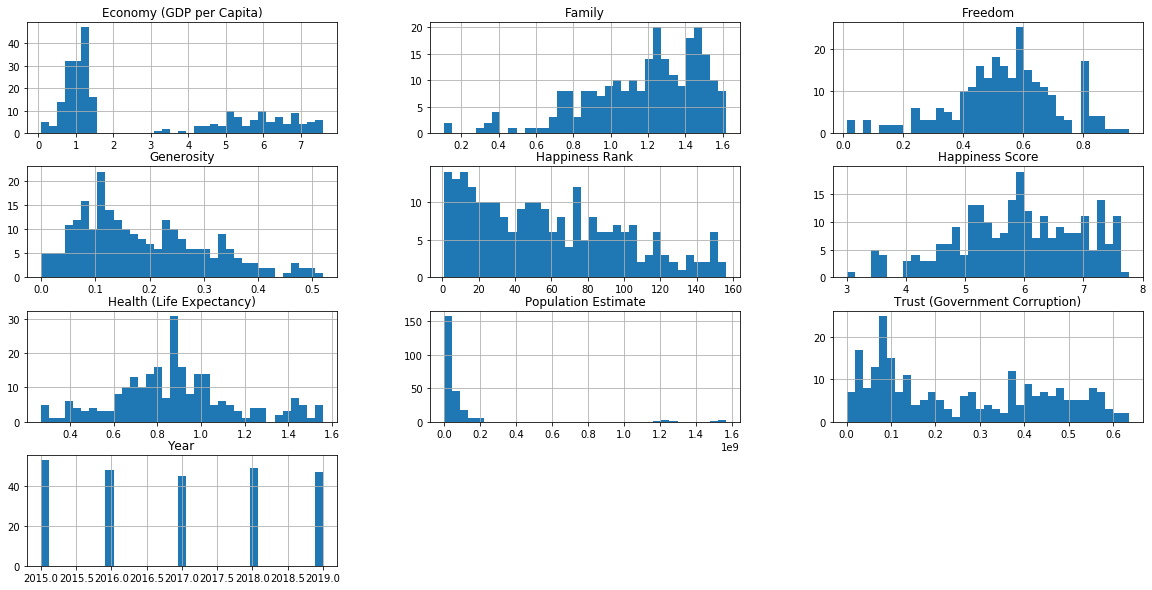

In [6]:
train_features.hist(bins=35,figsize=(20,10))
train_features.drop(['Country','Region'],axis=1,inplace = True) # Here we have a histogram for the given columns 

In [7]:
concatenation_df= pd.concat([train_features, train_labels], axis=1) 

#### concatenation_df combines the two dfs train_features and train labels to figure out the correlation for the United States.

In [8]:
concatenation_df

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Immigration to the United States
0,2016,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,5473.0
1,2018,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,11481.0
2,2019,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,2466.0
3,2019,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,1425.0
4,2016,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,3397.0
...,...,...,...,...,...,...,...,...,...,...,...
237,2017,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,46542.0
238,2018,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,11867.0
239,2017,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,15678.0
240,2019,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,51139.0


In [9]:
corr= concatenation_df.corr() # This is the correlation char. The most positive correaltion is family and hapiness score. The lowest negative correlation 
corr

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Immigration to the United States
Year,1.000000,-0.000885,-0.004539,-0.249025,0.338014,0.035403,-0.177911,-0.212852,-0.104436,-0.021754,-0.017201
Happiness Rank,-0.000885,1.000000,-0.991314,-0.197356,-0.691598,-0.532426,-0.566554,-0.373608,-0.193258,0.224219,0.126923
Happiness Score,-0.004539,-0.991314,1.000000,0.185357,0.698523,0.513560,0.576130,0.386655,0.222629,-0.217042,-0.134443
Economy (GDP per Capita),-0.249025,-0.197356,0.185357,1.000000,-0.077192,0.608317,0.599059,0.817017,0.007325,-0.025206,-0.030175
Family,0.338014,-0.691598,0.698523,-0.077192,1.000000,0.351260,0.433370,0.029096,0.041434,-0.183352,-0.186854
Health (Life Expectancy),0.035403,-0.532426,0.513560,0.608317,0.351260,1.000000,0.538678,0.667554,0.146313,-0.122050,-0.147452
Freedom,-0.177911,-0.566554,0.576130,0.599059,0.433370,0.538678,1.000000,0.616043,0.135727,0.003389,-0.042866
Trust (Government Corruption),-0.212852,-0.373608,0.386655,0.817017,0.029096,0.667554,0.616043,1.000000,0.274673,-0.035492,-0.058378
Generosity,-0.104436,-0.193258,0.222629,0.007325,0.041434,0.146313,0.135727,0.274673,1.000000,-0.162039,-0.170803
Population Estimate,-0.021754,0.224219,-0.217042,-0.025206,-0.183352,-0.122050,0.003389,-0.035492,-0.162039,1.000000,0.445795


In [10]:
corr['Immigration to the United States'].sort_values() # The correlations being sorted of Immigration to the United States by lowest to highest.

Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Happiness Rank                      0.126923
Population Estimate                 0.445795
Immigration to the United States    1.000000
Name: Immigration to the United States, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0d3c07290>,
      dtype=object)

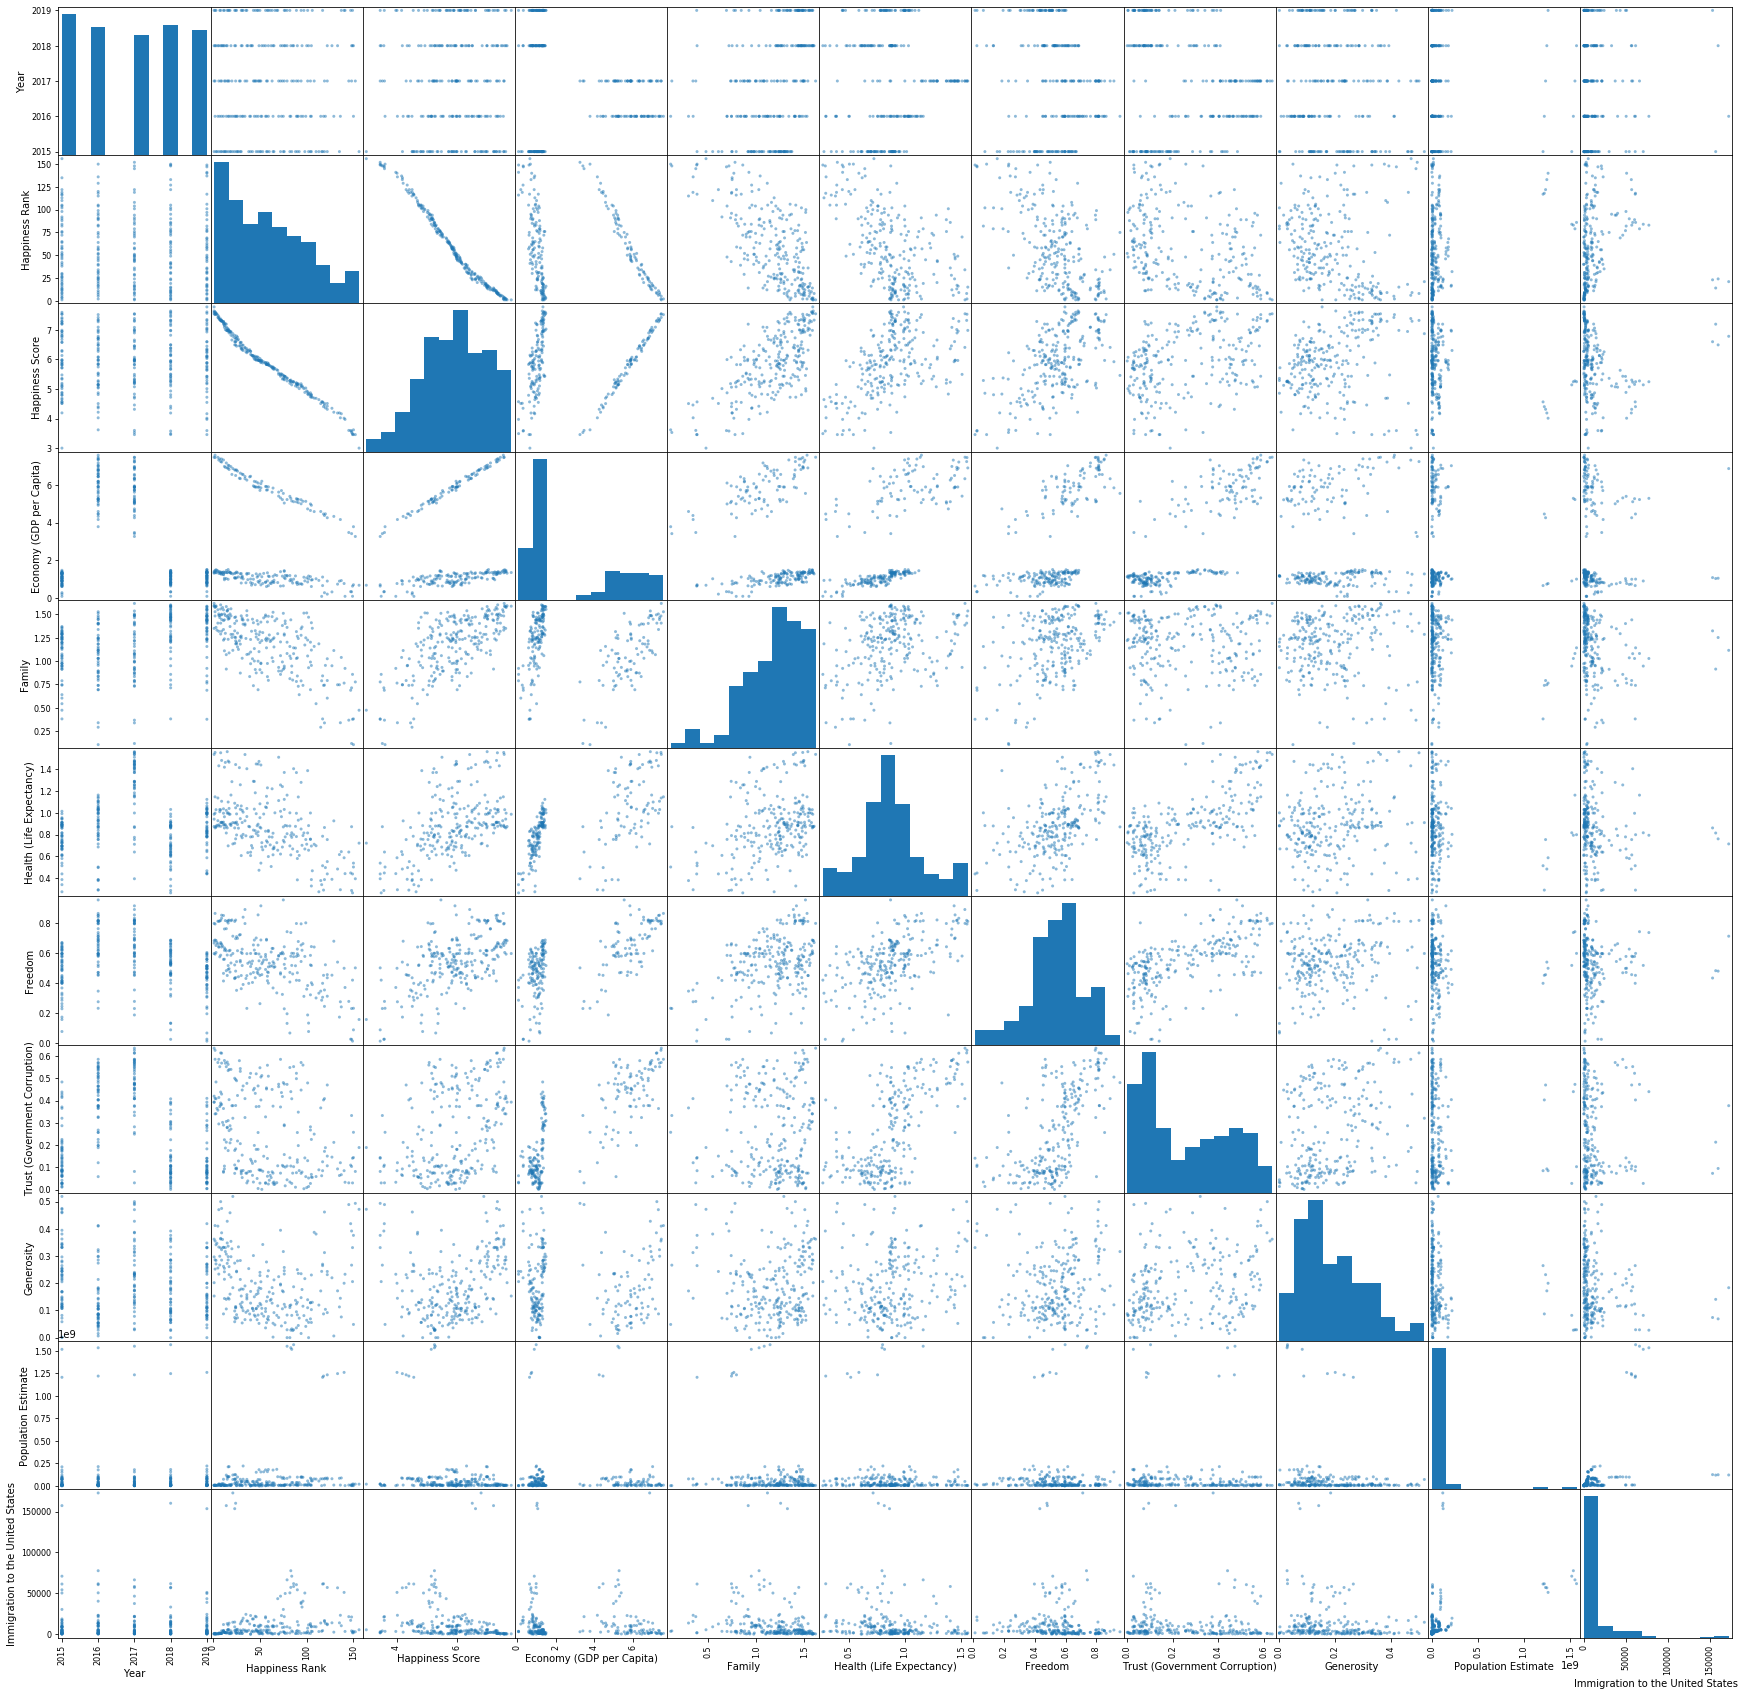

In [11]:
from pandas.plotting import scatter_matrix
attributes = ['Year','Happiness Rank','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Population Estimate','Immigration to the United States']
scatter_matrix(concatenation_df[attributes], figsize=(30,30)) # The scatter matrix for all features.

Lower down from here, I will be testing there types of models to see what has the smallest MSE. The models are Lasso, Ridge, and Polynomial. 

In [12]:
from sklearn.linear_model import Lasso # The Lasso model is shown here to compare to the other models to see which model shows the smallest MSE
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=10) #  chose here the alpha to be 10
lasso.fit(train_features, train_labels) # have the train features and train labels to fit into lasso.
hyp = lasso.predict(train_features)# use hyp as a variable to predict the model
mean_squared_error(train_labels, hyp) # use MSE 
np.sqrt(mean_squared_error(train_labels, hyp))# MSE squared root

21358.279580735227

In [13]:
from sklearn.linear_model import Ridge # The Ridge model is shown here to compare to the other models to see which model shows the smallest MSE

ridge = Ridge(alpha=10)#  chose here the alpha to be 10
ridge.fit(train_features, train_labels)# have the train features and train labels to fit into Ridge.
hyp = ridge.predict(train_features) # use hyp as a variable to predict the model
mean_squared_error(train_labels, hyp)# use MSE 
np.sqrt(mean_squared_error(train_labels, hyp))# MSE squaredroot

/Users/isingh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.61861e-19): result may not be accurate.
  overwrite_a=True).T


21572.44031801573

In [14]:
from sklearn.linear_model import LinearRegression # The Polynomial  model is shown here to compare to the other models to see which model shows the smallest MSE
from sklearn.preprocessing import PolynomialFeatures
p2 = PolynomialFeatures(degree=2)# degrees of freedom to be two
poly_x = p2.fit_transform(train_features)
regp2 = LinearRegression()
regp2.fit(poly_x, train_labels)
hyp3 = regp2.predict(poly_x)# use hyp as a variable to predict the model
mean_squared_error(train_labels, hyp3) # use MSE 
np.sqrt(mean_squared_error(train_labels, hyp3))# MSE squaredroot

19519.517074278978

In [15]:
from sklearn.linear_model import LinearRegression # similar to above except degrees of freedom = 10 
from sklearn.preprocessing import PolynomialFeatures
p2 = PolynomialFeatures(degree=10)
poly_x = p2.fit_transform(train_features)
regp2 = LinearRegression()
regp2.fit(poly_x, train_labels)
mean_squared_error(train_labels, regp2.predict(poly_x))
np.sqrt(mean_squared_error(train_labels, regp2.predict(poly_x)))

22461.847523651482

In [16]:
hyp3final = pd.DataFrame(hyp3, columns=['Immigration to the United States']).round(2)

hyp3final.to_csv('test_predictor.csv', index=None)

As you can see, the smallest MSE or the mean squared error was 19519.517 and it used the polynomial model. 